# Bandit Problem

### 10-armed testbed

Create a set of 2000 randomly generated 10-armed bandit problems.
Each row of the matrix is one of the 2000 bandit problems, each column is the Expected value of each one of its 10 actions, q∗(a), a = 1, . . . , 10, which is distributed normally with mean 0 and variance 1. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
n = 2000
k = 10
bandits = np.random.normal(0.0, 1.0, size=(n, k))

bandits[0:1,:]

array([[ 0.94521713, -1.03727326, -0.8856681 , -0.19198012,  0.27880184,
         0.35683476, -0.6336716 , -0.28255084, -0.03443657,  0.18232011]])

### ε-greedy method (Sutton-Barto 2.2)

Greedy action: q∗(At), the action with maximum reward.

In [4]:
# greedy action index
q_At = np.argmax(bandits, 1)  # max along columns (max of each row)
#print q_At.shape
q_At[0:1]

array([0])

When a greedy method is applied to the 10-armed testbed, the algorithm chooses the action mith maximum expected reward, this action is called the greedy action q∗(At). Note that the actual reward is stochastic, the model only knows the Expected reward, and the actual reward is random with q∗(At) as mean (expectation) and variance 1.

In [5]:
# ε-greedy method (Sutton-Barto 2.2)
Qs = np.zeros(shape=(n, k))
num_steps = 100
epsilon = .1
ratio_est_vs_opt = np.zeros(shape=(n,num_steps))
# for each model
for i in range(n):
    action_cum_reward = np.zeros(k)
    action_count = np.zeros(k)
    # 1 run
    for t in range(num_steps):       
        # estimate action value with epsilon-greedy method
        At = np.random.choice(range(10)) if np.random.sample() < epsilon else np.argmax(Qs[i,:])
        action_cum_reward[At] += Qs[i,At] + np.random.normal()
        action_count[At] += 1
        Qs[i, At] = action_cum_reward[At] / action_count[At]
        
        # calculate optimal reward
        optimal_reward = bandits[i, q_At[i]]
        
        # store the ratio of epsilon-greedy vs optimal at each step for plotting
        ratio_est_vs_opt[i, t] = sum(action_cum_reward[:]) / (optimal_reward * (t+1))
    
# average performance over all models
avg_ratio_all_models = np.mean(ratio_est_vs_opt, 0) # mean along rows (avg of each step over all models)

In the limit as the number of steps increases, every action will be sampled an infinite
number of times, thus ensuring that all the Qt(a) converge to q∗(a). This implies that the probability of selecting the optimal action converges to greater than 1 − ε, that is, to near certainty.

Question: how is that possible? Note: in RL there are no 'training' and 'prediction' modes, you are always predicting and training along the way, so if the algorithm always applies the epsilon and continue drawing random actions you will never achieve performance greater than 1 − ε even if the Qs are fully trained to perfect optimal values.

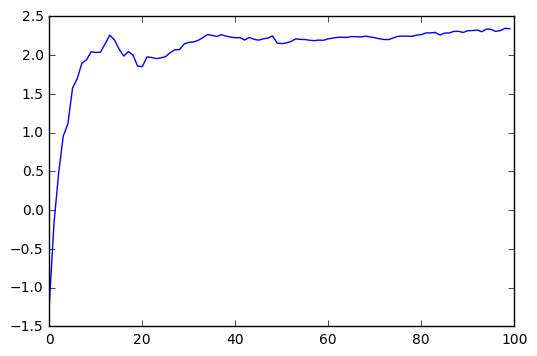

In [6]:
plt.plot(ratio_est_vs_opt[0,:])

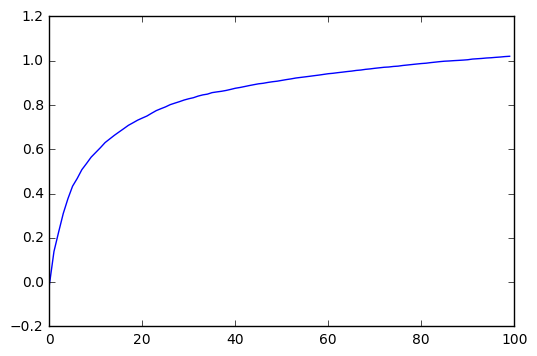

In [7]:
plt.plot(avg_ratio_all_models)